# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [23]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import pickle

import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers_balanced.pkl")
print(df.shape)
df.head()

(1876, 34)


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,0.135881,0.112033,0.172805,51,0.145852,0.149254,6,2,0.164852,1,0.118644,131160,1.0,11,0,1.0,6,1,0,0,3,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.135881,0.162630,0.174194,31,0.254296,0.154150,10,1,0.164852,1,0.256619,41890,0.0,23,1,6.0,3,5,1,4,2,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.144295,0.162630,0.316753,32,0.254296,0.154150,17,4,0.113687,4,0.118644,193280,1.0,15,3,5.0,2,5,0,3,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.135371,0.112033,0.138979,38,0.076433,0.154150,2,5,0.164852,3,0.118644,83210,3.0,11,3,13.0,5,8,7,5,2,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.135371,0.228956,0.138979,32,0.145852,0.154150,10,1,0.161826,1,0.256619,23420,4.0,12,2,9.0,2,6,0,4,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [25]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

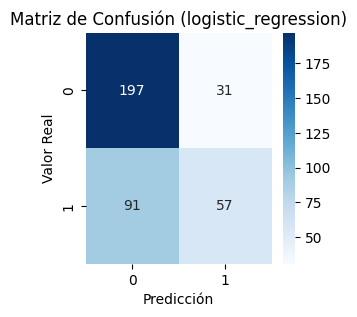

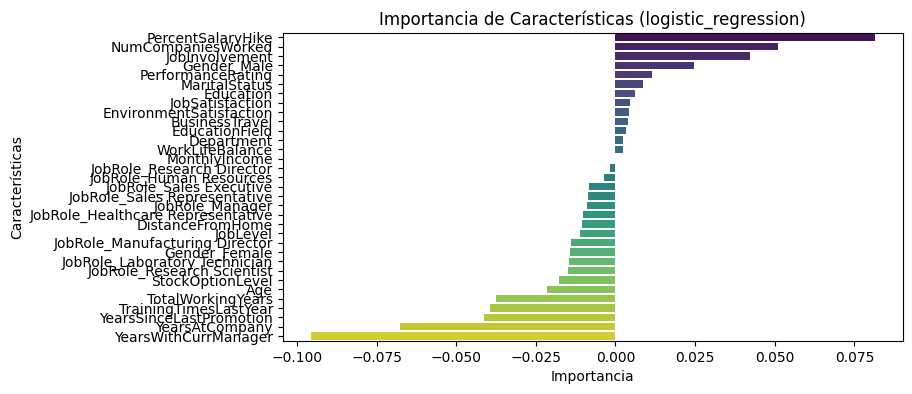

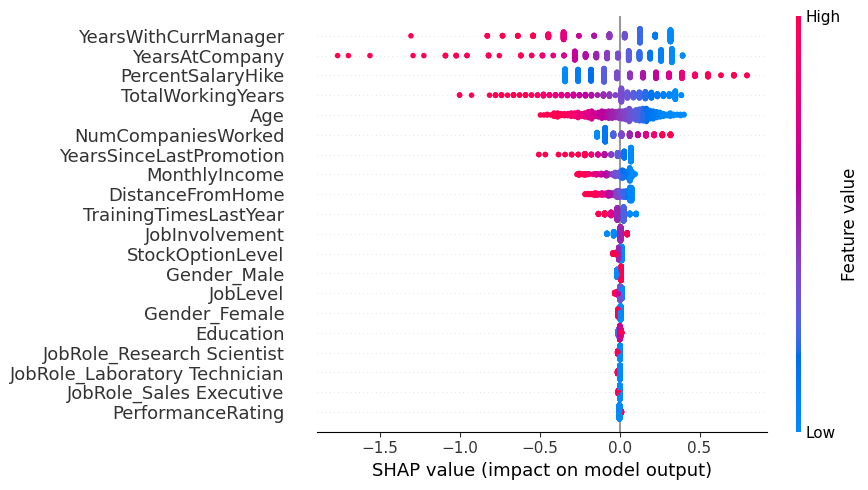

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.712000,0.704192,0.712000,0.697132,0.338985,0.750064,0.003057,NaN,NaN,NaN,regresion logistica
test,0.675532,0.669739,0.675532,0.653150,0.268249,0.720513,NaN,NaN,0.003057,NaN,regresion logistica


In [26]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=10)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.956667,0.956651,0.956667,0.956659,0.907015,0.990506,0.001,16.0,NaN,NaN
test,0.768617,0.771672,0.768617,0.769702,0.520408,0.748370,NaN,NaN,0.001,16.0


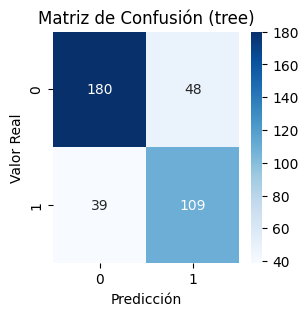

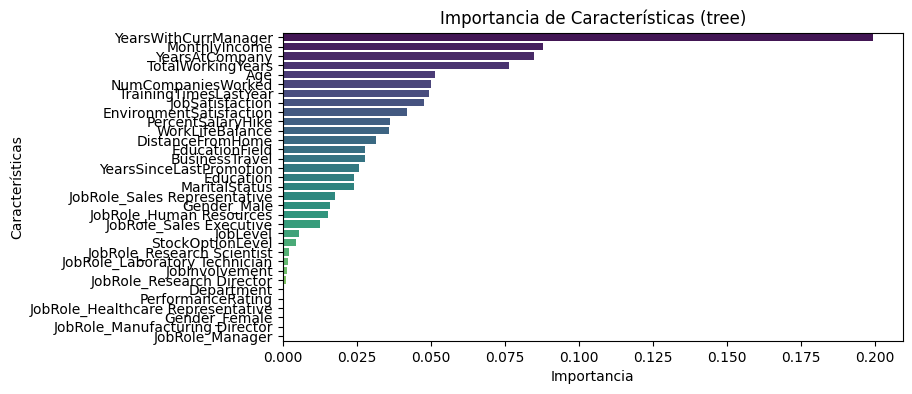

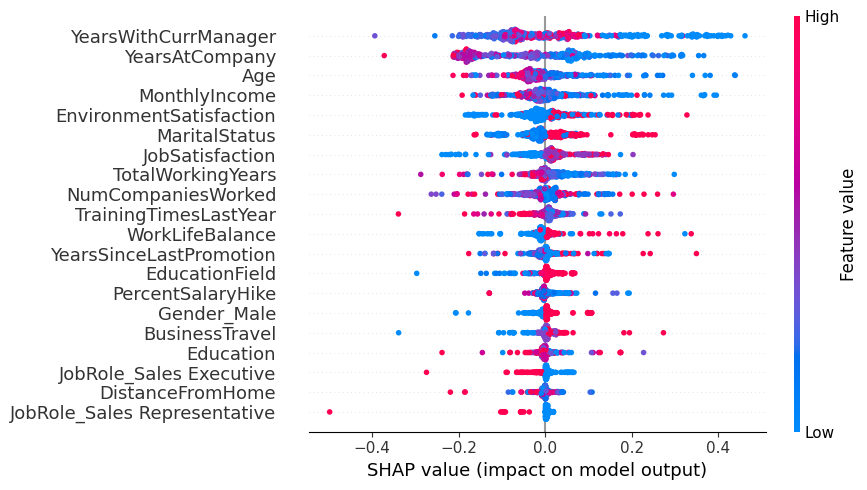

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.956667,0.956651,0.956667,0.956659,0.907015,0.990506,0.001000,16.0,NaN,NaN,decision tree
test,0.768617,0.771672,0.768617,0.769702,0.520408,0.748370,NaN,NaN,0.001000,16.0,decision tree
train,0.712000,0.704192,0.712000,0.697132,0.338985,0.750064,0.003057,NaN,NaN,NaN,regresion logistica
test,0.675532,0.669739,0.675532,0.653150,0.268249,0.720513,NaN,NaN,0.003057,NaN,regresion logistica


In [27]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=20, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.046032,-1.0,NaN,NaN
test,0.867021,0.875171,0.867021,0.863006,0.709733,0.918341,NaN,NaN,0.046032,-1.0


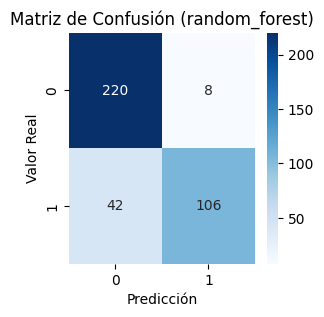

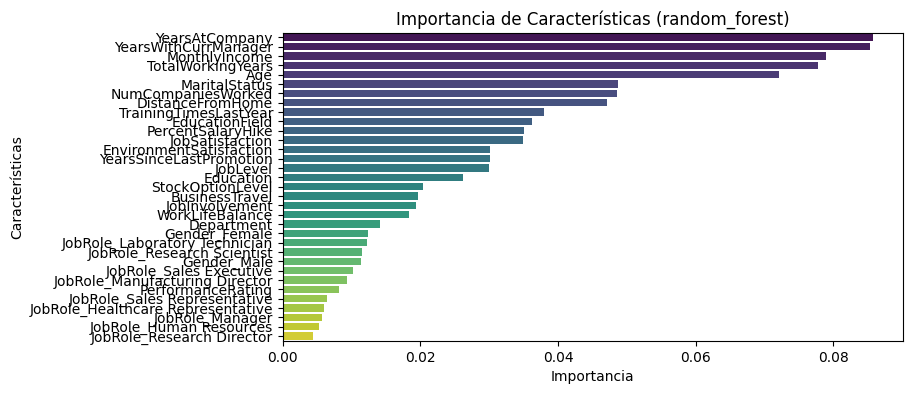

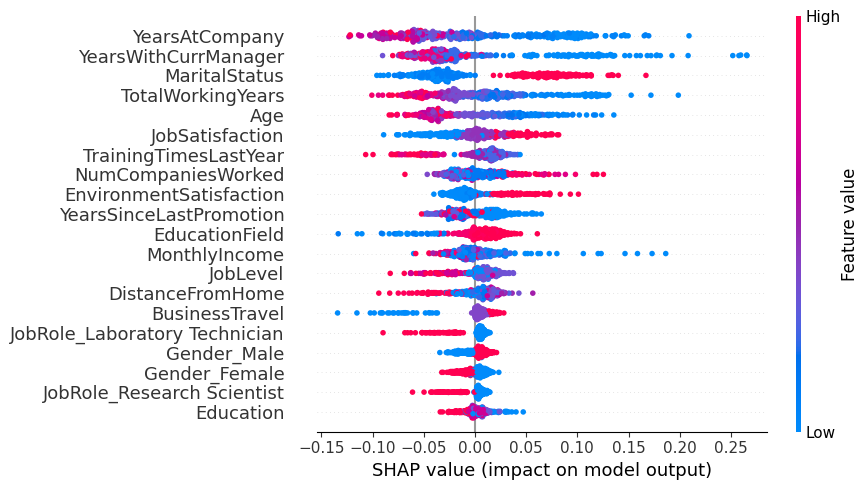

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.046032,-1.0,NaN,NaN,random forest
test,0.867021,0.875171,0.867021,0.863006,0.709733,0.918341,NaN,NaN,0.046032,-1.0,random forest
train,0.956667,0.956651,0.956667,0.956659,0.907015,0.990506,0.001000,16.0,NaN,NaN,decision tree
test,0.768617,0.771672,0.768617,0.769702,0.520408,0.748370,NaN,NaN,0.001000,16.0,decision tree
train,0.712000,0.704192,0.712000,0.697132,0.338985,0.750064,0.003057,NaN,NaN,NaN,regresion logistica
test,0.675532,0.669739,0.675532,0.653150,0.268249,0.720513,NaN,NaN,0.003057,NaN,regresion logistica


In [28]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")
modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

### **XGBoost**

In [29]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.998000,0.998000,0.998000,0.998000,0.995708,0.999994,0.018001,NaN,NaN,NaN,xgboost
test,0.875000,0.876267,0.875000,0.873213,0.732113,0.929913,NaN,NaN,0.018001,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.046032,-1.0,NaN,NaN,random forest
test,0.867021,0.875171,0.867021,0.863006,0.709733,0.918341,NaN,NaN,0.046032,-1.0,random forest
train,0.956667,0.956651,0.956667,0.956659,0.907015,0.990506,0.001000,16.0,NaN,NaN,decision tree
test,0.768617,0.771672,0.768617,0.769702,0.520408,0.748370,NaN,NaN,0.001000,16.0,decision tree
train,0.712000,0.704192,0.712000,0.697132,0.338985,0.750064,0.003057,NaN,NaN,NaN,regresion logistica
test,0.675532,0.669739,0.675532,0.653150,0.268249,0.720513,NaN,NaN,0.003057,NaN,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

### **Gradient Boosting**

In [30]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200,
                           subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.009992,16.0,NaN,NaN,gradient boosting
test,0.882979,0.883697,0.882979,0.881619,0.750121,0.923898,NaN,NaN,0.009992,16.0,gradient boosting
train,0.998000,0.998000,0.998000,0.998000,0.995708,0.999994,0.018001,NaN,NaN,NaN,xgboost
test,0.875000,0.876267,0.875000,0.873213,0.732113,0.929913,NaN,NaN,0.018001,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.046032,-1.0,NaN,NaN,random forest
test,0.867021,0.875171,0.867021,0.863006,0.709733,0.918341,NaN,NaN,0.046032,-1.0,random forest
train,0.956667,0.956651,0.956667,0.956659,0.907015,0.990506,0.001000,16.0,NaN,NaN,decision tree
test,0.768617,0.771672,0.768617,0.769702,0.520408,0.748370,NaN,NaN,0.001000,16.0,decision tree
train,0.712000,0.704192,0.712000,0.697132,0.338985,0.750064,0.003057,NaN,NaN,NaN,regresion logistica
test,0.675532,0.669739,0.675532,0.653150,0.268249,0.720513,NaN,NaN,0.003057,NaN,regresion logistica


## **Resumen:**

In [31]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.drop(columns=['time_seconds',
       'n_jobs', 'tiempo_computacion(segundos)', 'nucleos_usados'], inplace=True)
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_con_borde, axis=1)

df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,modelo
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
1,0.882979,0.883697,0.882979,0.881619,0.750121,0.923898,gradient boosting
2,0.998000,0.998000,0.998000,0.998000,0.995708,0.999994,xgboost
3,0.875000,0.876267,0.875000,0.873213,0.732113,0.929913,xgboost
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
5,0.867021,0.875171,0.867021,0.863006,0.709733,0.918341,random forest
6,0.956667,0.956651,0.956667,0.956659,0.907015,0.990506,decision tree
7,0.768617,0.771672,0.768617,0.769702,0.520408,0.748370,decision tree
8,0.712000,0.704192,0.712000,0.697132,0.338985,0.750064,regresion logistica
9,0.675532,0.669739,0.675532,0.653150,0.268249,0.720513,regresion logistica


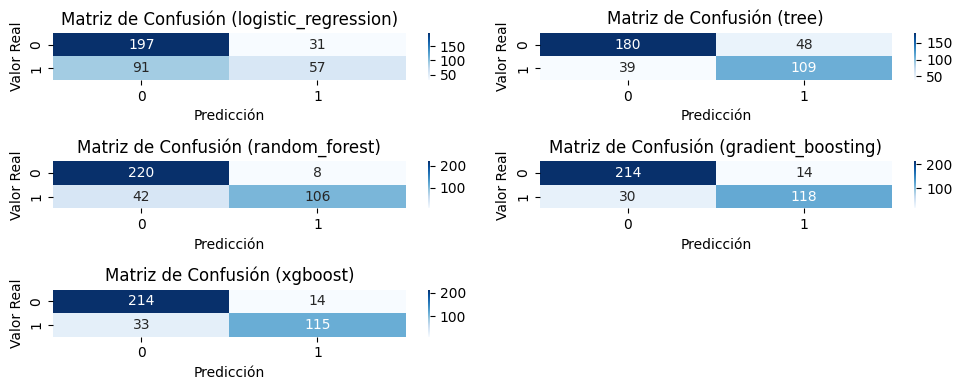

In [32]:
modelo_clasificacion.plot_all_matriz_confusion()

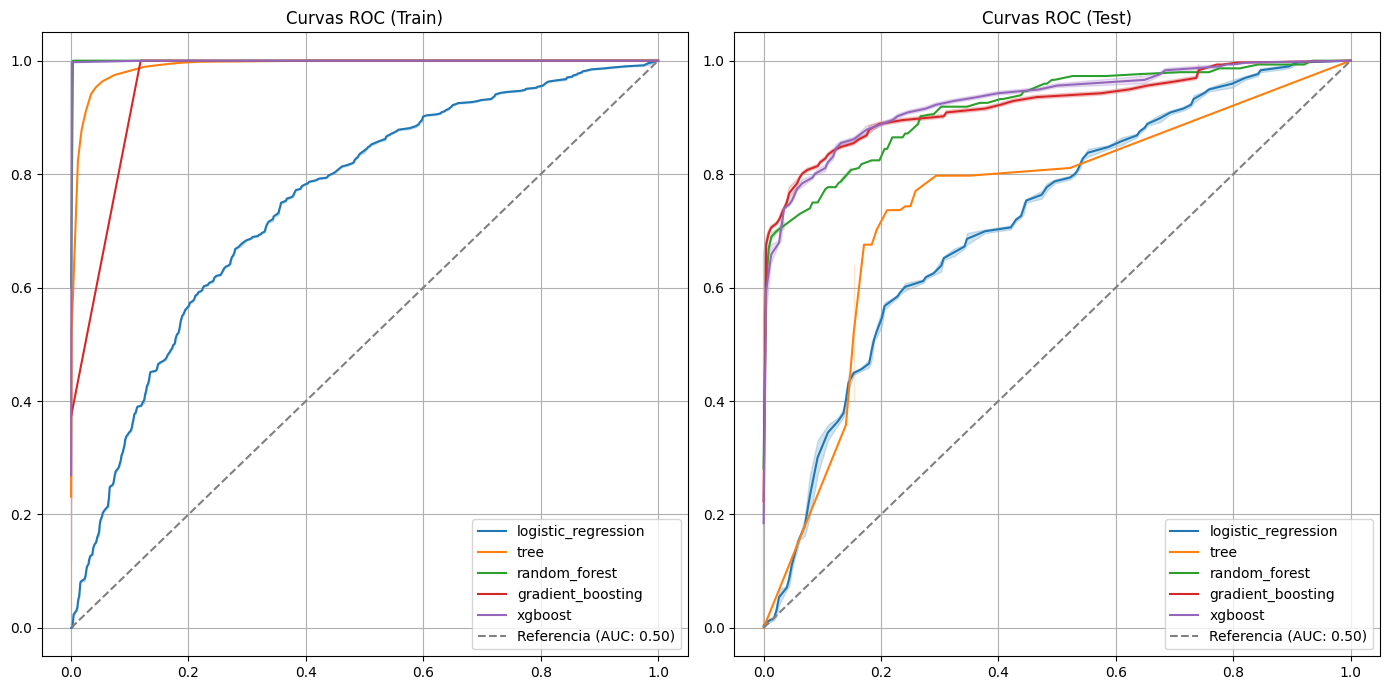

In [33]:
modelo_clasificacion.plot_curvas_roc_train_test()

Viendo las métricas la que mejor pinta tiene es la de XGBoost puesto que gradient parece mejor pero sin embargo en train que sea todo 1 nos indica que se lo está aprendiendo a la perfección acentuando el overfitting. Además, en cuanto a tiempo de computación el XGBoost tarda 13 segundo y el gradient 2 min. Por lo que vamos a intentar ajustar los parametros del xgboost para mejorar los datos del test.

### Reajuste de parámetros:

In [36]:
params = {'n_estimators': [100, 200, 250, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 6, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

modelo_clasificacion.ajustar_modelo("xgboost", param_grid=params)
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_xgboost

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.021,NaN,NaN,NaN,xgboost
test,0.880319,0.882444,0.880319,0.878384,0.742888,0.930447,NaN,NaN,0.021,NaN,xgboost


El mejor modelo es RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=200,
                       n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.998667,0.998669,0.998667,0.998666,0.997138,1.000000,0.080492,-1.0,NaN,NaN
test,0.880319,0.887483,0.880319,0.877128,0.739724,0.918889,NaN,NaN,0.080492,-1.0


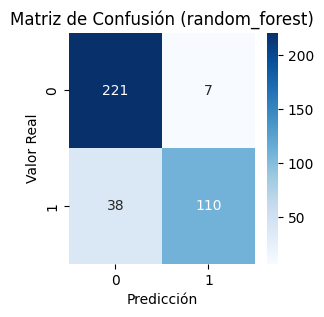

In [39]:
# random_forest

params = {'n_estimators': [100, 200, 250, 300],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'min_samples_split': [2, 3, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5]
        }

modelo_clasificacion.ajustar_modelo("random_forest", param_grid=params)
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")